# Finite Difference Methods

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

**Objective:**

To solve the black scholes pde and compare with the closed form solution for regular European calls and puts using the following methods:
1. Explicit Method
2. Implicit Method
3. Crank-Nicholson Method

The parameters related to the stock are as follows:

In [4]:
S0 = 24
K = 30
vol = 0.4
r = 0.06
T = 0.75

Step 1 : Compute the black scholes price

In [5]:
def black_scholes(S0,K,r,T,vol,call=1):
    d1 = (np.log(S0/K)+(r+0.5*vol**2)*(T))/(vol*(T**0.5))
    d2 = d1-(vol*(T**0.5))
    if call == 1:
        price = S0*st.norm.cdf(d1)-K*np.exp(-r*T)*st.norm.cdf(d2)
    else:
        price =-S0*st.norm.cdf(-d1)+K*np.exp(-r*T)*st.norm.cdf(-d2)
    return price

In [6]:
print(f'The black scholes price for call option is {np.round(black_scholes(S0,K,r,T,vol,call=1),2)} ')
print(f'The black scholes for put option is {np.round(black_scholes(S0,K,r,T,vol,call=0),2)} ')

The black scholes price for call option is 1.74 
The black scholes for put option is 6.42 


Step 2 : Generate a grid for the stock price:

In [7]:
def grid(NTS,T,Smax,NAS):
    s_values = [j*Smax/NAS for j in range(0,NAS+1)]
    t_values = [i*T/NTS for i in range(0,NTS+1)]
    grid = [np.zeros(NAS+1) for i in range(NTS+1)]
    return {'Time':t_values,'Stock':s_values,'Grid':grid}

Step 3: Solve the PDE at the grid points using the suitable methods

The black Scholes PDE is $\frac{\partial{V}}{\partial{t}}+rS\frac{\partial V}{\partial S}+\frac{1}{2}\sigma^2S^2\frac{\partial^2 V}{\partial S^2}-rV = 0$

a) **Explicit Method:**

In [8]:
def explicit_method(grid_dict,K,r,vol,call=1):
    v = grid_dict['Grid']
    s = grid_dict['Stock']
    t = grid_dict['Time']
    dt = t[1]-t[0]
    ds = s[1]-s[0]
    if call ==1:
        c =1
    else:
        c=-1
    payoff  = [np.maximum(c*(s[j]-K),0) for j in range(len(s))]
    v[-1] = payoff

    for i in range(len(t)-2,-1,-1):
        v[i][0] = np.maximum(c*(s[0]-K*np.exp(-r*(t[-1]-t[i]))),0)
        for j in range(1,len(s)-1):
            delta = (v[i+1][j+1]-v[i+1][j-1])/(2*ds)
            gamma = (v[i+1][j+1]+v[i+1][j-1]-2*v[i+1][j])/(ds**2)
            theta = r*v[i+1][j]-r*s[j]*delta-0.5*(vol**2)*(s[j]**2)*gamma
            v[i][j] = v[i+1][j]-dt*theta
        v[i][-1] = np.maximum(c*(s[-1]-K*np.exp(-r*(t[-1]-t[i]))),0)
    grid_dict['Grid'] = v
    
    g = pd.DataFrame(data = grid_dict['Grid'],index=grid_dict['Time'],columns=grid_dict['Stock'])
    g.index.name = 'Time'
    g.columns.name ='Stock Price'
    
    return g

In [9]:
c_exp =explicit_method(grid(200,T,60,30),K,r,vol,1)
np.round(c_exp.transpose(),3)

Time,0.00000,0.00375,0.00750,0.01125,0.01500,0.01875,0.02250,0.02625,0.03000,0.03375,...,0.71625,0.72000,0.72375,0.72750,0.73125,0.73500,0.73875,0.74250,0.74625,0.75000
Stock Price,,,,,,,,,,,,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
4.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
6.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
10.0,0.003,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
12.0,0.014,0.013,0.013,0.013,0.012,0.012,0.012,0.012,0.011,0.011,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
14.0,0.050,0.049,0.048,0.047,0.046,0.045,0.044,0.044,0.043,0.042,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
16.0,0.139,0.137,0.135,0.133,0.131,0.130,0.128,0.126,0.124,0.122,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0


In [10]:
p_exp =explicit_method(grid(200,T,60,30),K,r,vol,-1)
np.round(p_exp.transpose(),3)

Time,0.00000,0.00375,0.00750,0.01125,0.01500,0.01875,0.02250,0.02625,0.03000,0.03375,...,0.71625,0.72000,0.72375,0.72750,0.73125,0.73500,0.73875,0.74250,0.74625,0.75000
Stock Price,,,,,,,,,,,,,,,,,,,,,
0.0,28.680,28.686,28.693,28.699,28.706,28.712,28.719,28.725,28.732,28.738,...,29.939,29.946,29.953,29.960,29.966,29.973,29.980,29.987,29.993,30.0
2.0,26.680,26.686,26.693,26.699,26.706,26.712,26.719,26.725,26.731,26.738,...,27.939,27.946,27.953,27.960,27.966,27.973,27.980,27.987,27.993,28.0
4.0,24.680,24.686,24.693,24.699,24.706,24.712,24.719,24.725,24.731,24.738,...,25.939,25.946,25.953,25.960,25.966,25.973,25.980,25.987,25.993,26.0
6.0,22.680,22.686,22.693,22.699,22.706,22.712,22.719,22.725,22.731,22.738,...,23.939,23.946,23.953,23.960,23.966,23.973,23.980,23.987,23.993,24.0
8.0,20.680,20.687,20.693,20.699,20.706,20.712,20.719,20.725,20.732,20.738,...,21.939,21.946,21.953,21.960,21.966,21.973,21.980,21.987,21.993,22.0
10.0,18.682,18.689,18.695,18.702,18.708,18.714,18.721,18.727,18.734,18.740,...,19.939,19.946,19.953,19.960,19.966,19.973,19.980,19.987,19.993,20.0
12.0,16.693,16.699,16.706,16.712,16.718,16.724,16.730,16.737,16.743,16.749,...,17.939,17.946,17.953,17.960,17.966,17.973,17.980,17.987,17.993,18.0
14.0,14.729,14.735,14.740,14.746,14.752,14.757,14.763,14.769,14.774,14.780,...,15.939,15.946,15.953,15.960,15.966,15.973,15.980,15.987,15.993,16.0
16.0,12.819,12.823,12.828,12.832,12.837,12.842,12.846,12.851,12.855,12.860,...,13.939,13.946,13.953,13.960,13.966,13.973,13.980,13.987,13.993,14.0


In [11]:
print(f'The value of European call Option using explicit method is {round(c_exp.loc[0,S0],2)}')
print(f'The value of European put Option using explicit method is {round(p_exp.loc[0,S0],2)}')

The value of European call Option using explicit method is 1.73
The value of European put Option using explicit method is 6.41


b) **Implicit Method:**

Implcit Method involves M-1 simultaneous equations at each time step. First Define the Matrix for solving the equations

In [12]:
def implicit_pms(s,ds,dt,r,vol):
    A = (r*s/(2*ds)-(vol**2)*(s**2)/(2*ds**2))*dt
    B = 1+(r+(vol**2)*(s**2)/(ds**2))*dt
    C = (-r*s/(2*ds)-(vol**2)*(s**2)/(2*ds**2))*dt
    return A,B,C

In [13]:
def implicit_matrix(s_values,ds,dt,r,vol):
    M = len(s_values)
    matrix = np.zeros(shape=(M-2,M))
    for j in range(1,M-1):
        A,B,C  = implicit_pms(s_values[j],ds,dt,r,vol)
        matrix[j-1,j-1] = A
        matrix[j-1,j] = B
        matrix[j-1,j+1] = C
    
    return matrix    

In [14]:
def implicit_method(grid_dict,K,r,vol,call=1):
    v = grid_dict['Grid']
    s = grid_dict['Stock']
    t = grid_dict['Time']
    dt = t[1]-t[0]
    ds = s[1]-s[0]
    if call ==1:
        c =1
    else:
        c=-1
    payoff  = [np.maximum(c*(s[j]-K),0) for j in range(len(s))]
    v[-1] = payoff
    matrix = implicit_matrix(s,ds,dt,r,vol)
    for i in range(len(t)-2,-1,-1):
        v[i][0] = np.maximum(c*(s[0]-K*np.exp(-r*(t[-1]-t[i]))),0)
        v[i][len(s)-1] = np.maximum(c*(s[-1]-K*np.exp(-r*(t[-1]-t[i]))),0)
        r_mat = matrix[:,0]*v[i][0]+matrix[:,-1]*v[i][-1]
        v_mat = v[i+1][1:len(s)-1]
        M_mat = matrix[:,1:len(s)-1]
        v_current = np.matmul(np.linalg.inv(M_mat),(v_mat-r_mat))
        v[i][1:len(s)-1] = v_current
        
        
    grid_dict['Grid'] = v
    
    g = pd.DataFrame(data = grid_dict['Grid'],index=grid_dict['Time'],columns=grid_dict['Stock'])
    g.index.name = 'Time'
    g.columns.name ='Stock Price'    
        
    return g

In [15]:
c_imp = implicit_method(grid(200,T,60,30),K,r,vol,1)
np.round(c_imp.transpose(),3)

Time,0.00000,0.00375,0.00750,0.01125,0.01500,0.01875,0.02250,0.02625,0.03000,0.03375,...,0.71625,0.72000,0.72375,0.72750,0.73125,0.73500,0.73875,0.74250,0.74625,0.75000
Stock Price,,,,,,,,,,,,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
4.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
6.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
10.0,0.003,0.003,0.003,0.003,0.003,0.003,0.002,0.002,0.002,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
12.0,0.014,0.014,0.014,0.013,0.013,0.013,0.013,0.012,0.012,0.012,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
14.0,0.051,0.050,0.049,0.049,0.048,0.047,0.046,0.045,0.044,0.044,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
16.0,0.141,0.140,0.138,0.136,0.134,0.132,0.130,0.128,0.126,0.124,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0


In [16]:
p_imp = implicit_method(grid(200,T,60,30),K,r,vol,-1)
np.round(p_imp.transpose(),3)

Time,0.00000,0.00375,0.00750,0.01125,0.01500,0.01875,0.02250,0.02625,0.03000,0.03375,...,0.71625,0.72000,0.72375,0.72750,0.73125,0.73500,0.73875,0.74250,0.74625,0.75000
Stock Price,,,,,,,,,,,,,,,,,,,,,
0.0,28.680,28.686,28.693,28.699,28.706,28.712,28.719,28.725,28.732,28.738,...,29.939,29.946,29.953,29.960,29.966,29.973,29.980,29.987,29.993,30.0
2.0,26.680,26.687,26.693,26.699,26.706,26.712,26.719,26.725,26.732,26.738,...,27.939,27.946,27.953,27.960,27.966,27.973,27.980,27.987,27.993,28.0
4.0,24.680,24.687,24.693,24.699,24.706,24.712,24.719,24.725,24.732,24.738,...,25.939,25.946,25.953,25.960,25.966,25.973,25.980,25.987,25.993,26.0
6.0,22.680,22.687,22.693,22.699,22.706,22.712,22.719,22.725,22.732,22.738,...,23.939,23.946,23.953,23.960,23.966,23.973,23.980,23.987,23.993,24.0
8.0,20.680,20.687,20.693,20.700,20.706,20.713,20.719,20.726,20.732,20.738,...,21.939,21.946,21.953,21.960,21.966,21.973,21.980,21.987,21.993,22.0
10.0,18.683,18.689,18.696,18.702,18.708,18.715,18.721,18.728,18.734,18.740,...,19.939,19.946,19.953,19.960,19.966,19.973,19.980,19.987,19.993,20.0
12.0,16.694,16.701,16.707,16.713,16.719,16.725,16.731,16.738,16.744,16.750,...,17.939,17.946,17.953,17.960,17.966,17.973,17.980,17.987,17.993,18.0
14.0,14.731,14.737,14.742,14.748,14.754,14.759,14.765,14.771,14.776,14.782,...,15.939,15.946,15.953,15.960,15.966,15.973,15.980,15.987,15.993,16.0
16.0,12.822,12.826,12.831,12.835,12.840,12.844,12.849,12.853,12.858,12.863,...,13.939,13.946,13.953,13.960,13.966,13.973,13.980,13.987,13.993,14.0


In [17]:
print(f'The value of European call Option using implicit method is {round(c_imp.loc[0,S0],2)}')
print(f'The value of European put Option using implicit method is {round(p_imp.loc[0,S0],2)}')

The value of European call Option using implicit method is 1.73
The value of European put Option using implicit method is 6.41


c) **Crank-Nicholson Method:**

Crank Nicholson method is simply taking the average estimates from explicit and implicit methods to solve the pde at each point in the grid. The pde is then solved in a similar way to the implicit method.

In [18]:
def CN_pms(s,ds,dt,r,vol):
    A = -r*s/(4*ds)+vol**2*s**2/(4*ds**2)
    B = -1/dt-vol**2*s**2/(2*ds**2)-r/2
    C = r*s/(4*ds)+vol**2*s**2/(4*ds**2)
    D = 1/dt-vol**2*s**2/(2*ds**2)-r/2
    return A,B,C,D
    

In [19]:
def CN_matrix(s_values,ds,dt,r,vol):
    M=len(s_values)
    matrix_1 = np.zeros(shape=(M-2,M))
    matrix_2 = np.zeros(shape=(M-2,M))
    for j in range(1,M-1):
        A,B,C,D = CN_pms(s_values[j],ds,dt,r,vol)
        matrix_1[j-1,j-1] = A
        matrix_1[j-1,j] = B
        matrix_1[j-1,j+1] = C
        
        matrix_2[j-1,j-1] = A
        matrix_2[j-1,j] = D
        matrix_2[j-1,j+1] = C
    return matrix_1,matrix_2

In [20]:
def CN_method(grid_dict,K,r,vol,call=1):
    v = grid_dict['Grid']
    s = grid_dict['Stock']
    t = grid_dict['Time']
    dt = t[1]-t[0]
    ds = s[1]-s[0]
    if call ==1:
        c =1
    else:
        c=-1
    payoff  = [np.maximum(c*(s[j]-K),0) for j in range(len(s))]
    v[-1] =payoff
    matrices =CN_matrix(s,ds,dt,r,vol)
    
    matrix_1 = matrices[0]
    matrix_2 = matrices[1]
    
    for i in range(len(t)-2,-1,-1):
        v[i][0] = np.maximum(c*(s[0]-K*np.exp(-r*(t[-1]-t[i]))),0)
        v[i][-1] = np.maximum(c*(s[-1]-K*np.exp(-r*(t[-1]-t[i]))),0)
        v2 = v[i+1]
        M_2 = np.matmul(matrix_2,v2)
        r_1 = matrix_1[:,0]*v[i][0]+matrix_1[:,-1]*v[i][-1]
        M_1 = matrix_1[:,1:len(s)-1]
        v[i][1:len(s)-1] = np.matmul(np.linalg.inv(M_1),-M_2-r_1)
    
    grid_dict['Grid'] = v
    
    g = pd.DataFrame(data = grid_dict['Grid'],index=grid_dict['Time'],columns=grid_dict['Stock'])
    g.index.name = 'Time'
    g.columns.name ='Stock Price'    
        
    return g

In [21]:
c_CN = CN_method(grid(200,T,60,30),K,r,vol,1)
np.round(c_CN.transpose(),3)

Time,0.00000,0.00375,0.00750,0.01125,0.01500,0.01875,0.02250,0.02625,0.03000,0.03375,...,0.71625,0.72000,0.72375,0.72750,0.73125,0.73500,0.73875,0.74250,0.74625,0.75000
Stock Price,,,,,,,,,,,,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
4.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
6.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
10.0,0.003,0.003,0.003,0.003,0.002,0.002,0.002,0.002,0.002,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
12.0,0.014,0.014,0.013,0.013,0.013,0.012,0.012,0.012,0.012,0.011,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
14.0,0.050,0.049,0.049,0.048,0.047,0.046,0.045,0.044,0.044,0.043,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
16.0,0.140,0.138,0.136,0.135,0.133,0.131,0.129,0.127,0.125,0.123,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0


In [22]:
p_CN = CN_method(grid(200,T,60,30),K,r,vol,-1)
np.round(p_CN.transpose(),3)

Time,0.00000,0.00375,0.00750,0.01125,0.01500,0.01875,0.02250,0.02625,0.03000,0.03375,...,0.71625,0.72000,0.72375,0.72750,0.73125,0.73500,0.73875,0.74250,0.74625,0.75000
Stock Price,,,,,,,,,,,,,,,,,,,,,
0.0,28.680,28.686,28.693,28.699,28.706,28.712,28.719,28.725,28.732,28.738,...,29.939,29.946,29.953,29.960,29.966,29.973,29.980,29.987,29.993,30.0
2.0,26.680,26.686,26.693,26.699,26.706,26.712,26.719,26.725,26.732,26.738,...,27.939,27.946,27.953,27.960,27.966,27.973,27.980,27.987,27.993,28.0
4.0,24.680,24.686,24.693,24.699,24.706,24.712,24.719,24.725,24.732,24.738,...,25.939,25.946,25.953,25.960,25.966,25.973,25.980,25.987,25.993,26.0
6.0,22.680,22.686,22.693,22.699,22.706,22.712,22.719,22.725,22.732,22.738,...,23.939,23.946,23.953,23.960,23.966,23.973,23.980,23.987,23.993,24.0
8.0,20.680,20.687,20.693,20.700,20.706,20.712,20.719,20.725,20.732,20.738,...,21.939,21.946,21.953,21.960,21.966,21.973,21.980,21.987,21.993,22.0
10.0,18.683,18.689,18.695,18.702,18.708,18.715,18.721,18.727,18.734,18.740,...,19.939,19.946,19.953,19.960,19.966,19.973,19.980,19.987,19.993,20.0
12.0,16.694,16.700,16.706,16.712,16.718,16.725,16.731,16.737,16.743,16.749,...,17.939,17.946,17.953,17.960,17.966,17.973,17.980,17.987,17.993,18.0
14.0,14.730,14.736,14.741,14.747,14.753,14.758,14.764,14.770,14.775,14.781,...,15.939,15.946,15.953,15.960,15.966,15.973,15.980,15.987,15.993,16.0
16.0,12.820,12.825,12.829,12.834,12.838,12.843,12.848,12.852,12.857,12.861,...,13.939,13.946,13.953,13.960,13.966,13.973,13.980,13.987,13.993,14.0


In [23]:
print(f'The value of European call Option using Crank-Nicholson method is {round(c_CN.loc[0,S0],2)}')
print(f'The value of European put Option using Crank-Nicholson method is {round(p_CN.loc[0,S0],2)}')

The value of European call Option using Crank-Nicholson method is 1.73
The value of European put Option using Crank-Nicholson method is 6.41


All the three methods give almost same results for the option when calculated using the number of asset steps as 30. The three methods needs to be investigated as number of asset steps is increased without ibncreasing time steps bas well as for other stock prices.

Setting up four scenarios:
1. No of asset steps = 30
2. No of asset steps = 60
3. No of asset steps = 100
4. No of asset steps = 200

The following parameters are same for all of the scenarios:

In [24]:
K = 50
vol = 0.4
r = 0.06
T = 0.8
NTS = 200
Smax = 200

In [25]:
NAS = [30,60,100,200]

In [26]:
grids =[]
for i in NAS:
    explicit = explicit_method(grid(NTS,T,Smax,i),K,r,vol,-1).iloc[0,:]
    implicit = implicit_method(grid(NTS,T,Smax,i),K,r,vol,-1).iloc[0,:]
    crank_nic = CN_method(grid(NTS,T,Smax,i),K,r,vol,-1).iloc[0,:]
    black_schol = black_scholes(implicit.index,K,r,T,vol,call=0)
    err_1 = np.abs(black_schol - explicit)
    err_2 = np.abs(black_schol - implicit)
    err_3 = np.abs(black_schol - crank_nic)
    grids.append(pd.DataFrame({'Explicit':explicit,
                               'Implicit':implicit,
                               'Crank-Nicholson':crank_nic,
                               'Black-Scholes':black_schol,
                               'Explicit error':err_1,
                               'Implicit error':err_2,
                               'CN error': err_3
                              }))

<ipython-input-5-d34b73692beb>:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K)+(r+0.5*vol**2)*(T))/(vol*(T**0.5))


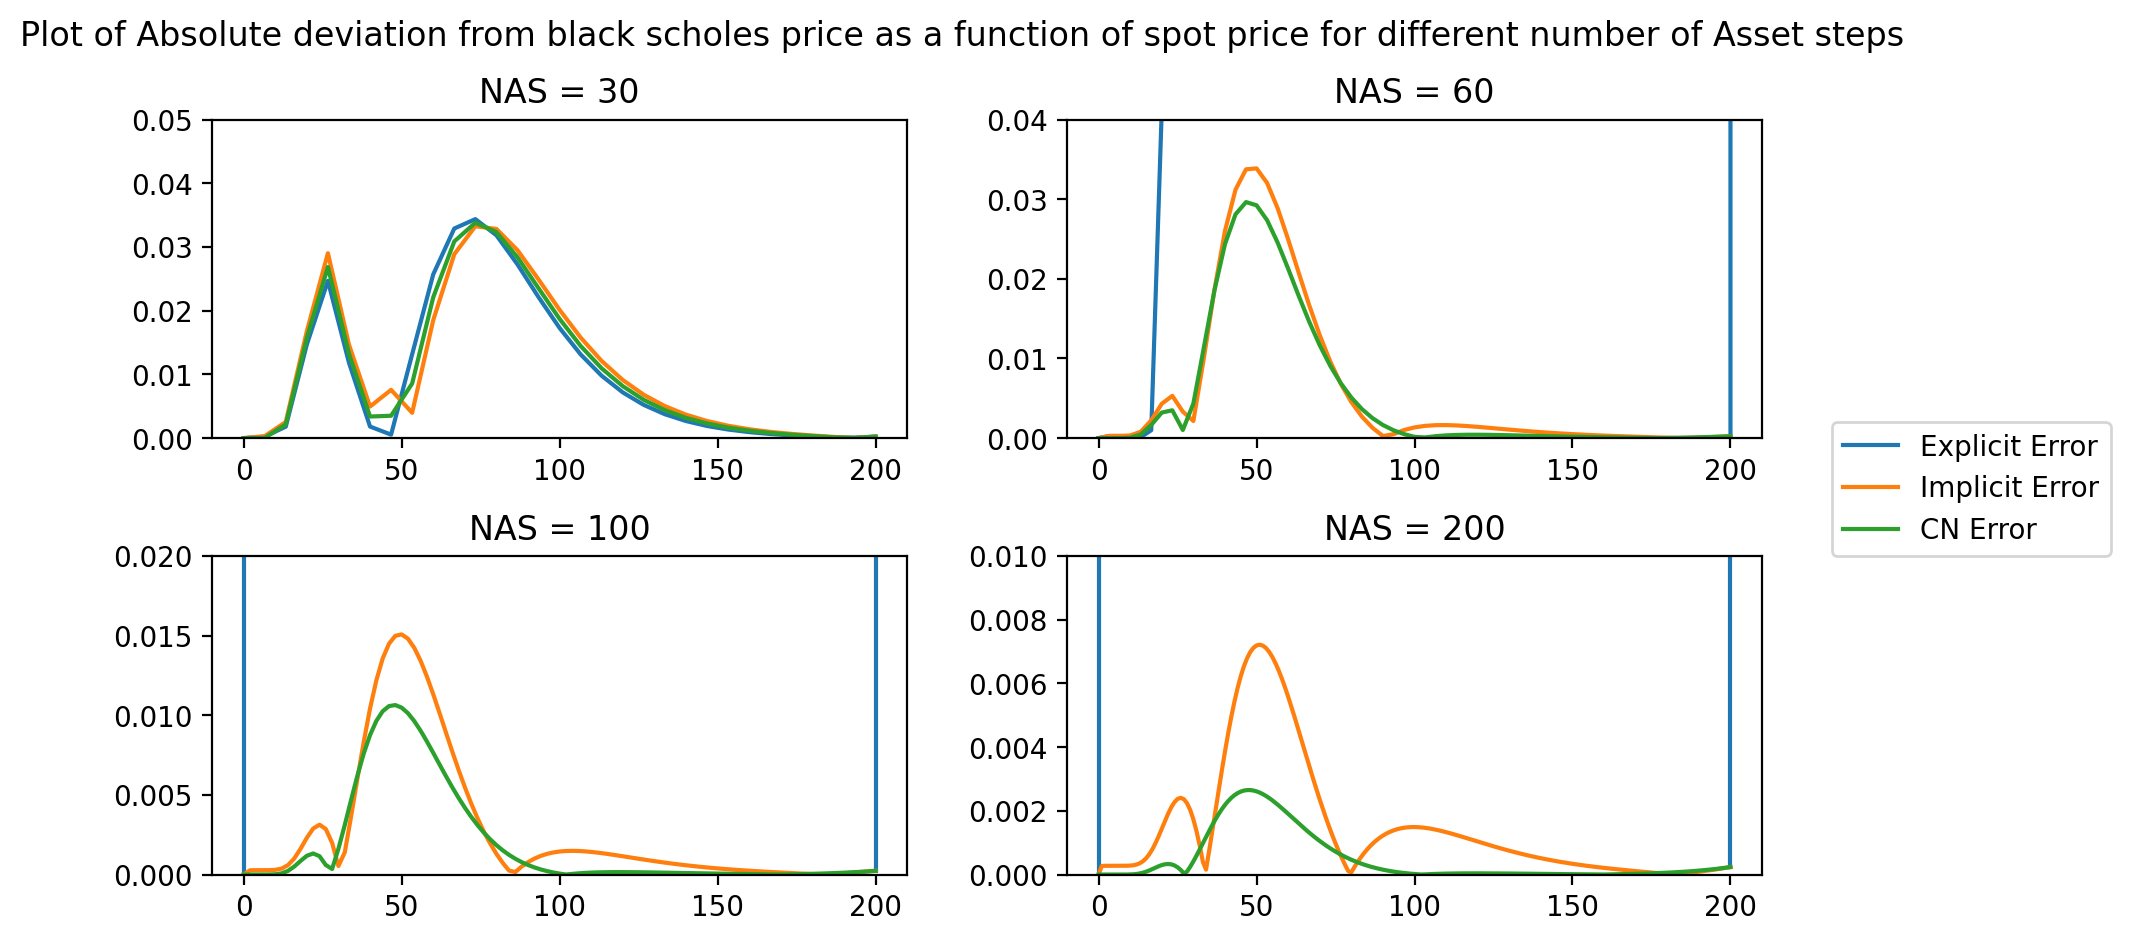

In [27]:
fig,ax  = plt.subplots(2,2,figsize=(10,5),dpi=200)
ax[0,0].set_ylim(0,0.05)
ax[0,1].set_ylim(0,0.04)
ax[1,0].set_ylim(0,0.02)
ax[1,1].set_ylim(0,0.01)
for i in range(0,2):
    for j in range(0,2):
        k=i*2+j
        ax[i][j].plot(grids[k].index,grids[k]['Explicit error'],label ='Explicit Error')
        ax[i][j].plot(grids[k].index,grids[k]['Implicit error'],label ='Implicit Error')
        ax[i][j].plot(grids[k].index,grids[k]['CN error'],label ='CN Error')
        ax[i][j].set_title(f'NAS = {NAS[k]}')
plt.legend(loc=(1.1,1))
plt.subplots_adjust(hspace=0.37,wspace =0.23)
plt.suptitle('Plot of Absolute deviation from black scholes price as a function of spot price for different number of Asset steps')
plt.show()

From the above plot, it is very clear that the explicit method is unstable as the number of asset steps is increased and the time step is kept constant. For low time steps, the method is just as accurate as the other steps. Even though the explicit method is very easy to implement, it has a very serious limitation. So the method should be avoided.

The implicit method and Crank-Nicholson perform better on higher asset steps. As the number of asset steps increases, the error in relation to the black scholes prices decreases. As seen in the plot, the Crank-Nicholson method has the lowest error values at higher NAS. So the Crank-Nicholson method is the preferred finite difference method for solving pdes.

Another thing to note from the plot is that the error is highest when the stock is at the money. As it goes either in or out of the money the error decreases.